In [33]:
# linked datasets
uuids = 'ff77fcae7f6d9b5b7b8741c282677eef'

In [34]:
# read in cell centroid positions
file <- paste0('datasets/', uuids, '/sprm_outputs/reg001_expr.ome.tiff-cell_centers.csv')
pos <- read.csv(file, row.names=1)
head(pos)

,x,y,z
,<dbl>,<dbl>,<dbl>
0,0,0,0
1,4,4982,0
2,4,6617,0
3,4,7290,0
4,4,3983,0
5,5,4527,0


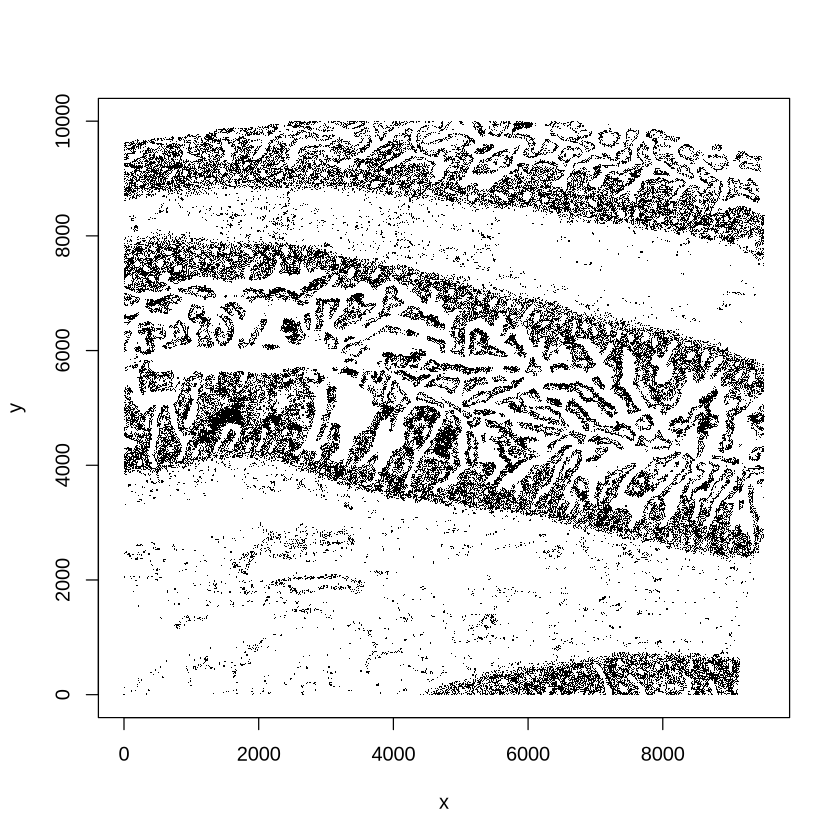

In [35]:
plot(pos[, c('x', 'y')], pch=".")

In [36]:
# cell type clusters
file <- paste0('datasets/', uuids, '/sprm_outputs/reg001_expr.ome.tiff-cell_cluster.csv')
annot <- read.csv(file, row.names=1)
head(annot)

,K.Means..Mean..Expression,K.Means..Covariance..Expression,K.Means..Total..Expression,K.Means..Mean.All.SubRegions..Expression,K.Means..Shape.Vectors.,K.Means..Texture.,K.Means..tSNE_All_Features.,K.Means..Shape.Vectors.Normalized.,K.Means..UMAP_All_Features.
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
34,1,1,1,1,2,1,1,1,1
70,1,1,1,1,3,1,10,2,3
92,1,1,1,1,3,1,7,2,2
93,1,1,1,1,3,1,9,2,2
94,1,1,1,1,2,1,10,1,4
98,1,1,1,1,3,1,10,1,4



    1     2     3     4 
10981 16970 12170 17721 


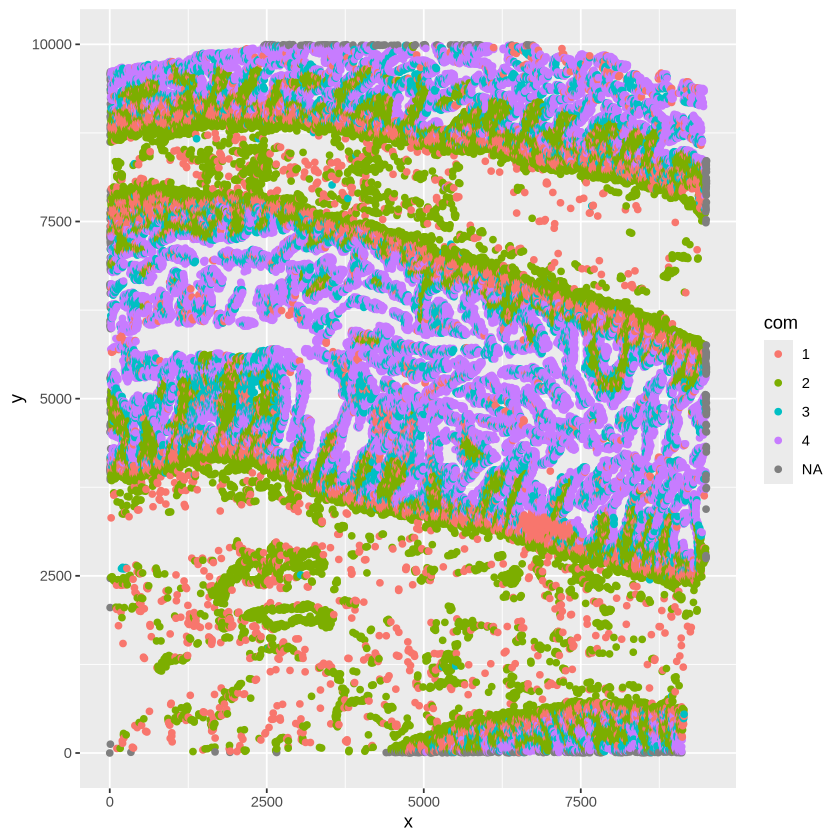

In [37]:
print(table(annot[rownames(pos),9]))

library(ggplot2)
df <- data.frame(pos, com = as.factor(annot[rownames(pos),9]))
ggplot(df, aes(x=x, y=y, col=com)) + geom_point() 

In [38]:
# read in whole cell protein expression
#file <- paste0('datasets/', uuids, '/sprm_outputs/reg001_expr.ome.tiff-cell_channel_meanAll.csv')
file <- paste0('datasets/', uuids, '/sprm_outputs/reg001_expr.ome.tiff-nuclei_channel_mean.csv')
mat <- read.csv(file, row.names=1)
head(mat)

,Hoechst1,MUC1,CD25,CDX2,Vimentin,CD57,NKG2D,CD7,CD4,CD19,⋯,CD45,BCL2,CD44,Podoplanin,Cytokeratin,CD163,OLFM4,CD206,aDefensin5,DRAQ5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,10.85294,0.9705882,1.0000000,1.2941176,1.058824,0.7647059,1.0000000,4.0882353,0.23529412,0.5882353,⋯,14.6764706,9.3235294,7.76470588,4.7352941,14.02941176,2.7058824,0.85294118,1.323529412,0.00000000,4.676471
70,29.39701,0.6059701,1.0089552,1.7134328,0.280597,0.9970149,1.1820896,5.1492537,0.22089552,0.5701493,⋯,35.9641791,5.2716418,0.60895522,0.5641791,5.50149254,0.3164179,0.00000000,0.008955224,0.01791045,17.892537
92,40.37021,0.5276596,1.0255319,1.9446809,5.357447,0.7446809,1.4510638,1.8340426,0.55319149,0.3702128,⋯,50.0382979,7.4127660,32.17021277,26.1787234,0.00000000,4.8851064,0.00000000,1.148936170,0.00000000,25.191489
93,24.96396,1.2702703,1.1531532,1.1171171,23.171171,0.2792793,0.8558559,4.3243243,0.19819820,0.1351351,⋯,44.1621622,68.2522523,36.38738739,5.6306306,0.01801802,3.1891892,0.34234234,0.513513514,0.17117117,16.360360
94,19.17797,0.4830508,0.8728814,0.9915254,0.000000,0.7118644,0.9237288,0.8305085,0.00000000,0.1355932,⋯,7.3728814,0.8474576,0.00000000,0.4915254,7.77966102,0.2542373,0.00000000,0.050847458,0.06779661,12.779661
98,30.14706,1.5882353,0.9411765,2.1029412,0.000000,0.6764706,1.2132353,0.3382353,0.02205882,0.7500000,⋯,0.2058824,0.9926471,0.08088235,0.2426471,6.59558824,0.2279412,0.05147059,0.110294118,0.10294118,19.198529


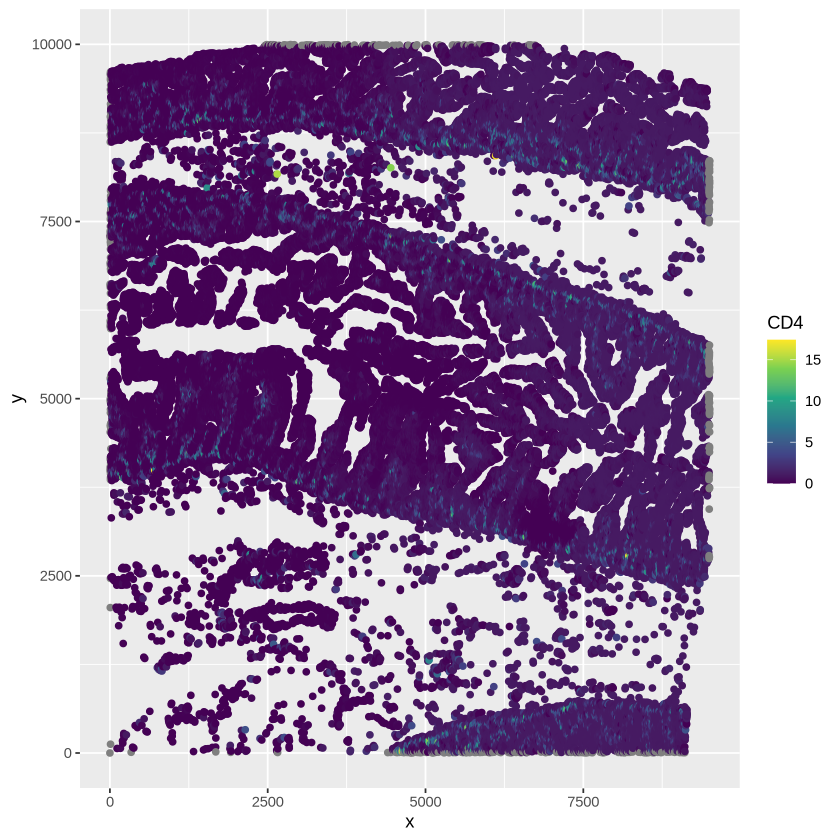

In [39]:
library(ggplot2)
df <- data.frame(pos, mat[rownames(pos),])
ggplot(df, aes(x=x, y=y, col=CD4)) + geom_point() + scale_color_viridis_c()

In [40]:
print(dim(pos))
print(dim(mat))

[1] 58225     3
[1] 57842    54


In [41]:
# subset to same cells
pos <- pos[rownames(mat),]
print(dim(pos))
print(dim(mat))

[1] 57842     3
[1] 57842    54


In [42]:
# uncomment to subset to one cell type
vi <- rownames(pos)[annot[rownames(pos),9] == 1]
pos <- pos[vi,]
mat <- mat[vi,]

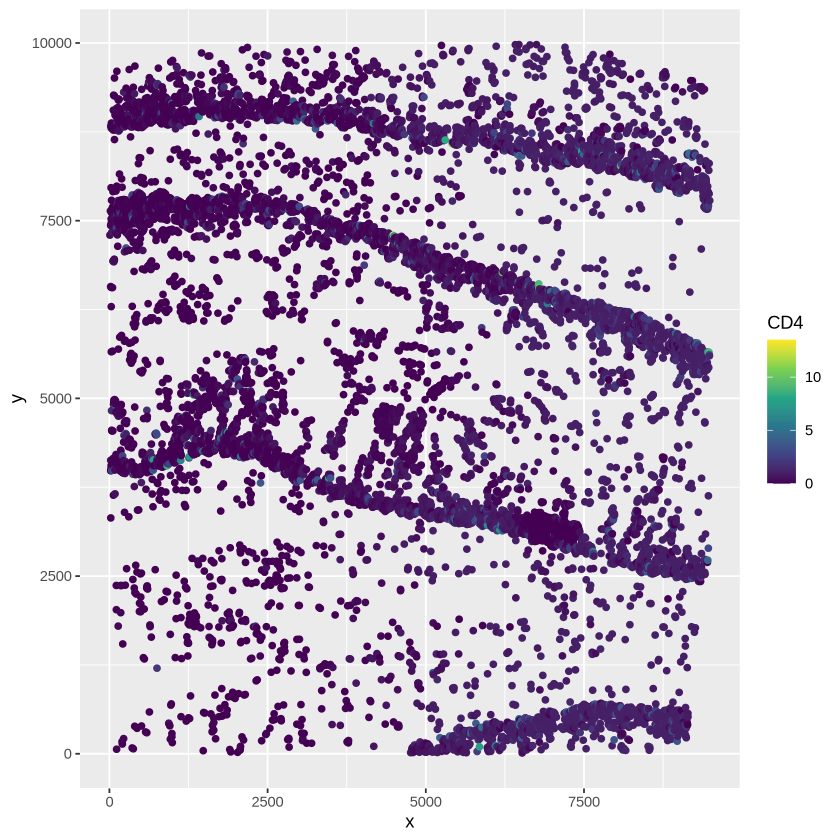

In [43]:
library(ggplot2)
df <- data.frame(pos, mat[rownames(pos),])
ggplot(df, aes(x=x, y=y, col=CD4)) + geom_point() + scale_color_viridis_c()

In [44]:
# use SEraster to rasterize into pixels to 
# minimize memory usage 
library(SpatialExperiment)
library(SEraster)

ppos <- as.matrix(cbind(x=pos$x, y=pos$y))
rownames(ppos) <- rownames(pos)
se <- SpatialExperiment(
	assays = list(mat = t(mat)), ## must be columns as cells
	spatialCoords = ppos ## must be rows as cells
)

In [45]:
res <- 1000 # pick reasonable resolution (currently unclear if position units are pixels or microns)

rastGexp <- SEraster::rasterizeGeneExpression(se, 
	assay_name="mat", 
	resolution = res, 
	square=FALSE,
	n_threads = 1)

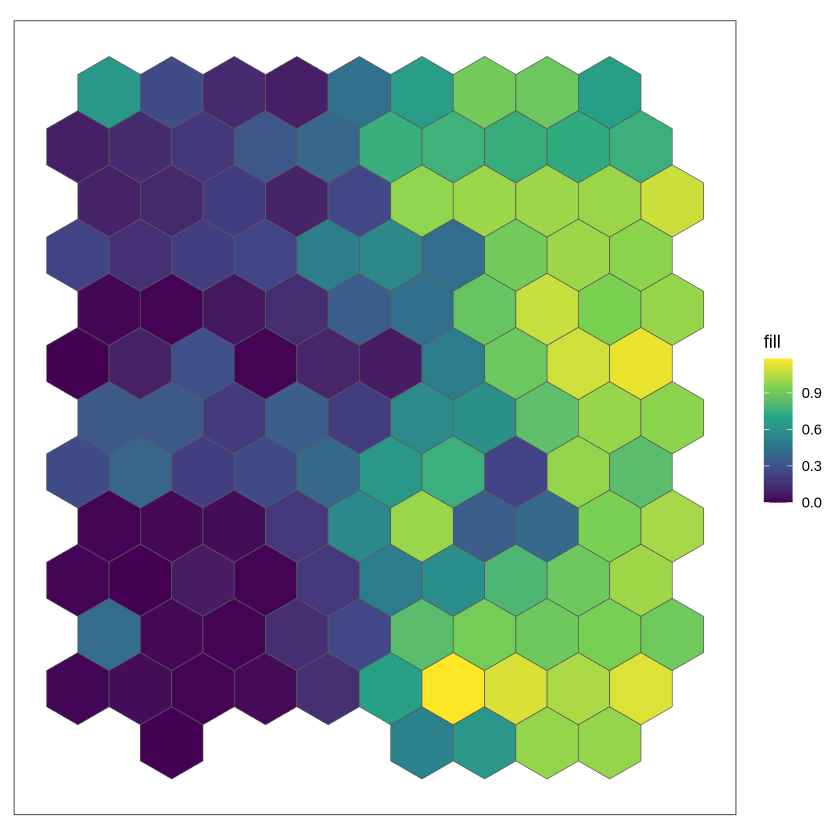

In [46]:
# plot rasterized expression
SEraster::plotRaster(rastGexp, feature_name='CD4')

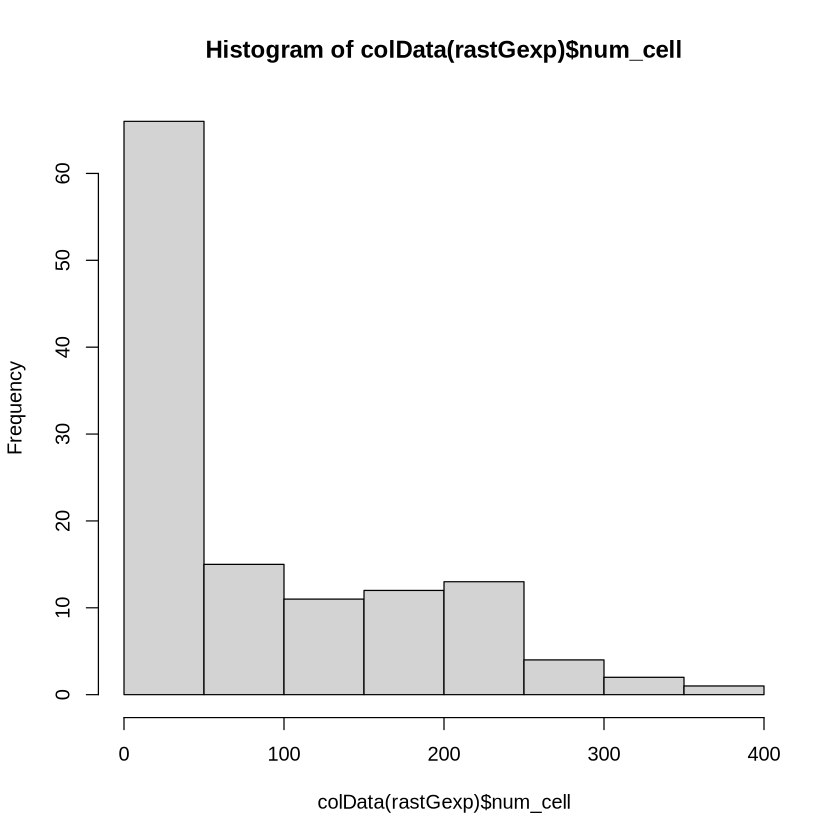

In [47]:
# number of cells per pixel
hist(colData(rastGexp)$num_cell)

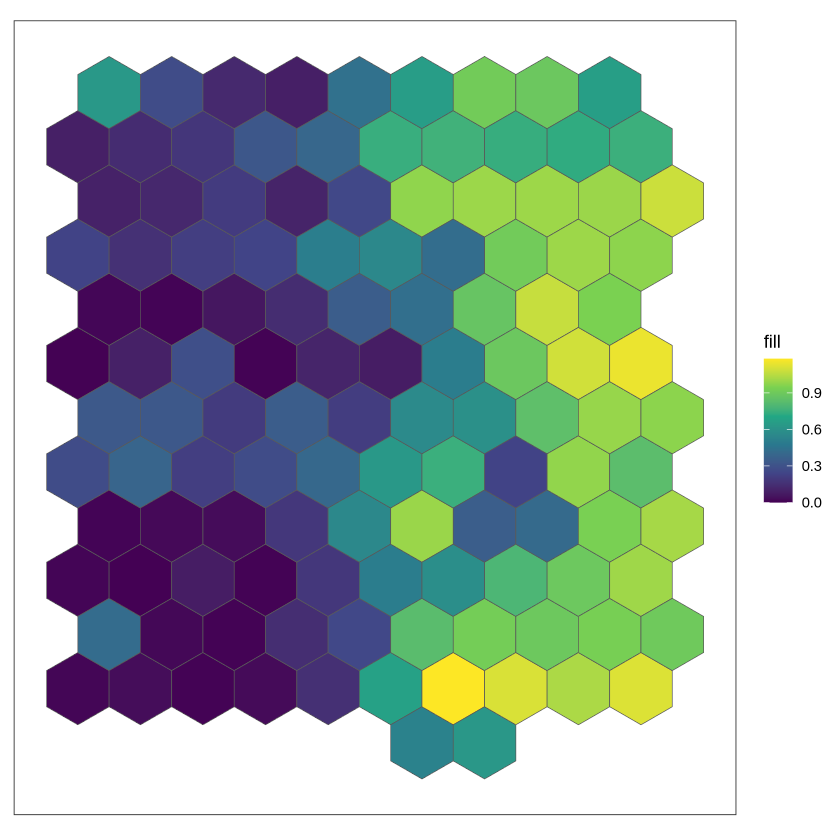

In [48]:
# filter
vi <- colData(rastGexp)$num_cell > 1
# plot rasterized expression
SEraster::plotRaster(rastGexp[,vi], feature_name='CD4')

In [49]:
# use MERINGUE to quantify Moran's I statistic for all proteins
# to identify spatially variable proteins
rastpos <- spatialCoords(rastGexp[,vi])
pixelval <- assay(rastGexp[,vi], 'pixelval')

library(MERINGUE)
# Make adjacency weight matrix based on Voronoi tessellation
w <- MERINGUE::getSpatialNeighbors(rastpos, filterDist = res)
# Identify sigificantly spatially auto-correlated genes
I <- getSpatialPatterns(pixelval, w)

In [50]:
print(dim(I))
print(table(I$p.adj < 0.05))

[1] 54  5

FALSE  TRUE 
   10    44 


In [51]:
head(I[order(I$observed, decreasing=TRUE),])

,observed,expected,sd,p.value,p.adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD4,0.7588244,-0.008403361,0.08619699,0.000000e+00,0.000000e+00
CD57,0.6925397,-0.008403361,0.08615496,2.220446e-16,5.995204e-15
HLADR,0.5687195,-0.008403361,0.08590059,9.180434e-12,1.652478e-10
CD49f,0.5482480,-0.008403361,0.08564153,4.021783e-11,5.429407e-10
Hoechst1,0.5095901,-0.008403361,0.08579439,7.820455e-10,8.446092e-09
CD138,0.4859547,-0.008403361,0.08344911,1.570385e-09,1.413346e-08


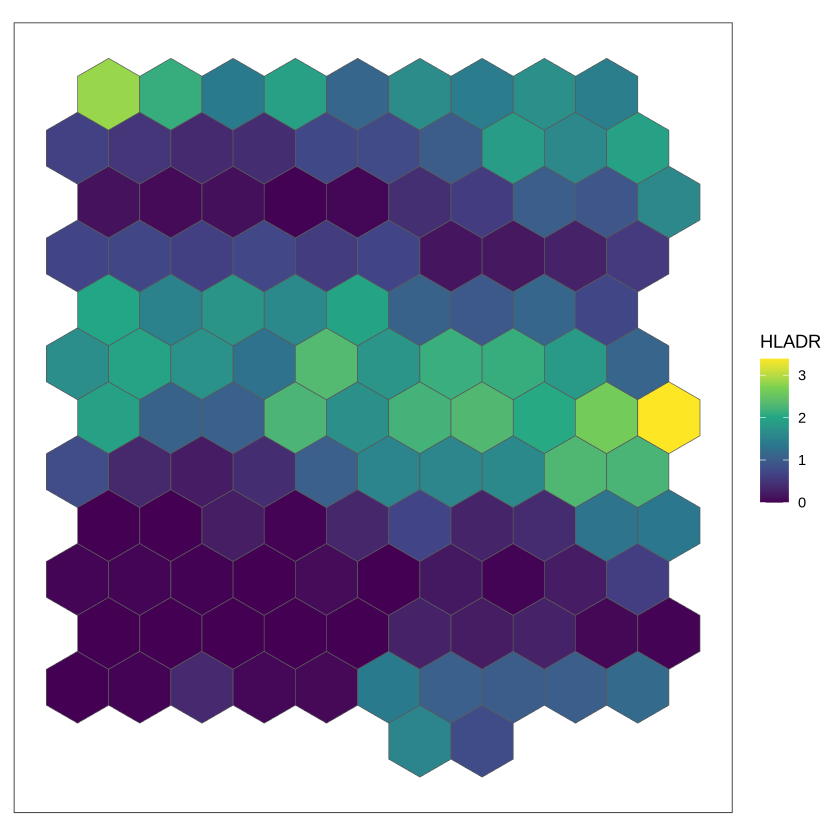

In [53]:
# plot
g <- "HLADR"
SEraster::plotRaster(rastGexp[,vi], feature_name = g, name = g)

In [54]:
head(I[order(I$p.adj, decreasing=TRUE),])

,observed,expected,sd,p.value,p.adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aSMA,-0.0634214725,-0.008403361,0.08420271,0.7432510,0.7432510
CD31,-0.0028002277,-0.008403361,0.08176791,0.4726839,0.4816025
CD21,0.0006452386,-0.008403361,0.06933161,0.4480807,0.4653146
CHGA,0.0196642738,-0.008403361,0.06884657,0.3417529,0.3618560
SOX9,0.0200334178,-0.008403361,0.06554167,0.3321902,0.3587655
CD49a,0.0341753676,-0.008403361,0.08455265,0.3072795,0.3386345


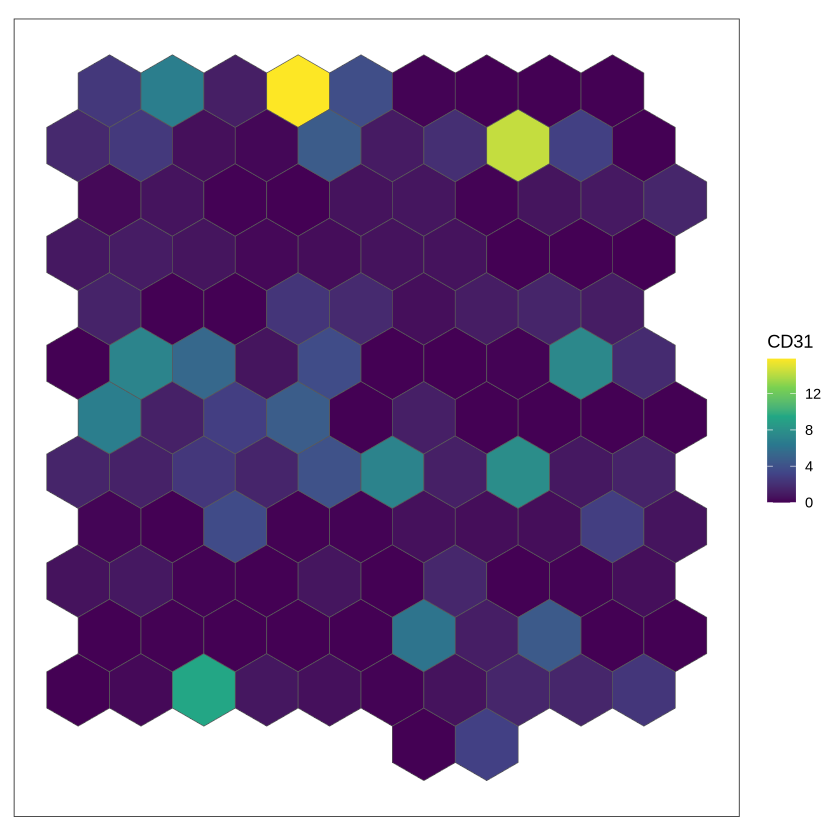

In [56]:
# plot
g <- "CD31"
SEraster::plotRaster(rastGexp[,vi], feature_name = g, name = g)